In [112]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
!pip3 install colorspacious 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from colorspacious import cspace_converter
from matplotlib.ticker import FuncFormatter

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\Alan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [113]:

# Load the CSV data into a pandas DataFrame
data_50000 = pd.read_csv('lcp_ratio.50000.csv')
full_df_50000 = pd.DataFrame(data_50000, columns=[
                       'lcp', 'sa_b','sa', 'hash_b', 'hash', 'bhash_b', 'bhash'])
full_df_50000 = full_df_50000.rename(columns={'lcp': 'Average LCP Length', 'sa': 'SA Query Time', 'hash': 'Hash Query Time', 'bhash': 'B-Hash Query Time',
                                              'sa_b': 'SA Building Time', 'hash_b': 'Hash Building Time', 'bhash_b': 'B-Hash Building Time'})



In [114]:
data_10000 = pd.read_csv('lcp_ratio.10000.csv')
full_df_10000 = pd.DataFrame(data_10000, columns=[
                       'lcp', 'sa_b','sa', 'hash_b', 'hash', 'bhash_b', 'bhash'])
full_df_10000 = full_df_10000.rename(columns={'lcp': 'Average LCP Length', 'sa': 'SA Query Time', 'hash': 'Hash Query Time', 'bhash': 'B-Hash Query Time',
                                              'sa_b': 'SA Building Time', 'hash_b': 'Hash Building Time', 'bhash_b': 'B-Hash Building Time'})



In [115]:
full_df_50000


Average LCP Length  SA Building Time  SA Query Time  Hash Building Time  \
0                   1              0.44           4.68                0.02   
1                   2              0.32           6.43                0.01   
2                   3              0.33           7.68                0.01   
3                  11              0.38          12.22                0.01   
4                  22              0.38          13.71                0.01   
5                  48              0.43          14.96                0.01   

   Hash Query Time  B-Hash Building Time  B-Hash Query Time  
0             4.92                   0.0               9.11  
1             6.60                   0.0              24.99  
2             7.39                   0.0              34.76  
3            11.55                   0.0              67.14  
4            15.14                   0.0              85.26  
5            20.32                   0.0             105.46

In [116]:
full_df_10000

Average LCP Length  SA Building Time  SA Query Time  Hash Building Time  \
0                   1              0.44           0.89                0.01   
1                   3              0.45           0.98                0.01   
2                  10              0.43           1.14                0.01   
3                  15              0.42           1.18                0.01   
4                  62              0.45           1.28                0.01   
5                 300              0.52           1.36                0.01   

   Hash Query Time  B-Hash Building Time  B-Hash Query Time  
0             0.49                   0.0               0.71  
1             0.57                   0.0               1.66  
2             0.68                   0.0               2.89  
3             0.72                   0.0               3.41  
4             1.00                   0.0               5.01  
5             1.48                   0.0               6.75

In [117]:
def RGBtoHex(vals, rgbtype=1):
  """Converts RGB values in a variety of formats to Hex values.

     @param  vals     An RGB/RGBA tuple
     @param  rgbtype  Valid valus are:
                          1 - Inputs are in the range 0 to 1
                        256 - Inputs are in the range 0 to 255

     @return A hex string in the form '#RRGGBB' or '#RRGGBBAA'
"""

  if len(vals)!=3 and len(vals)!=4:
    raise Exception("RGB or RGBA inputs to RGBtoHex must have three or four elements!")
  if rgbtype!=1 and rgbtype!=256:
    raise Exception("rgbtype must be 1 or 256!")

  #Convert from 0-1 RGB/RGBA to 0-255 RGB/RGBA
  if rgbtype==1:
    vals = [255*x for x in vals]

  #Ensure values are rounded integers, convert to hex, and concatenate
  return '#' + ''.join(['{:02X}'.format(int(round(x))) for x in vals])

# pal = ["#ED979D", "#D0BFDB", "#EEE1A8", "#33B065", "#5E81DA"]
# pal2 = ["#E25863", "#B093C3", "#CAAB26", "#33B065", "#5E81DA"]

#google_pal2 = ["#CCAC1C", "#33B065", "#3333FF"]
#google_pal1 = ["#FFD580", "#ceecdf", "#979DED"]
# google_pal2 = ["#fea82f", "#29bf12", "#3f88c5"]
# google_pal1 = ["#FFD580", "#adf6a2", "#c0d8ec"]

cm = plt.cm.get_cmap('tab20c')
color_map0 = list(sns.color_palette('tab10'))
color_map1 = list(sns.color_palette('tab20'))
color_map2 = list(sns.color_palette('tab20c'))
cm4 = list(sns.color_palette("husl", 8))
# google_pal2 = [RGBtoHex(color_map[0]), RGBtoHex(color_map[2]), RGBtoHex(color_map[4])]
google_pal2 = [cm4[5], color_map1[2], color_map1[4]]
google_pal1 = [color_map2[3], color_map2[7], color_map2[11]]
# sns.color_palette('tab20')
new_pal2 = ["#1F77B4", "#FD7924", "#2CA02C"]
new_pal1 = ["#AEC7E8", "#FFBB78", "#98DF8A"]
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [118]:
ax = sns.barplot(x='Average LCP Length', y='SA Building Time', 
                 data=full_df_10000,color=color_map[2], saturation=1)

sns.color_palette('tab20')


NameError: name 'color_map' is not defined

In [ ]:
sns.color_palette('tab20c')

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

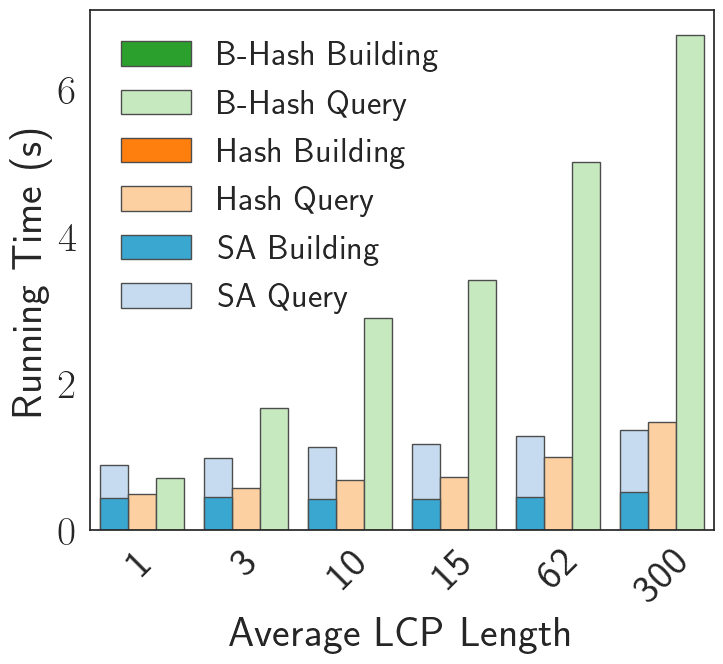

In [125]:
sns.set(rc={'figure.figsize':(7.4,6.8)})
sns.set_style('white')

ax = sns.barplot(x='Average LCP Length', y='value', 
                 hue='variable', 
                 hue_order=['SA Query Time', 'Hash Query Time', 'B-Hash Query Time'], 
                 data=pd.melt(full_df_10000, ['Average LCP Length']),
                 palette=google_pal1, edgecolor="0.3", saturation=1)

ax.set_xlabel(r'Average LCP length', fontsize="30.5", font="Lucida Console Bold")
ax.set_ylabel(r'Running Time ($\times$ 1e8)', fontsize="30.5", font="Lucida Console Bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize="30.5", font="Lucida Console")
ax.tick_params(axis='both', which='major', labelsize=30)
# Set the legend title and location
labels = ["SA Query Time", "Hash Query Time", "B-Hash Query Time"]
order = [0, 1, 2]
ax.set_xticklabels([str(int(tick)) for tick in ax.get_xticks()])

ax.legend(edgecolor='None')
ax = sns.barplot(x='Average LCP Length', y='value', hue='variable', 
                 hue_order=['SA Building Time', 'Hash Building Time', 'B-Hash Building Time'], 
                 data=pd.melt(full_df_10000, ['Average LCP Length']), palette=google_pal2, edgecolor="0.3", saturation=1,bottom=[0]*len(full_df_10000["Average LCP Length"]))
handles, labels = plt.gca().get_legend_handles_labels()
# ax.set_ylabel(r'Running Time($s$)', fontsize="14", font="Lucida Console Bold")
ax.set_ylabel(r'Running Time (s)', fontsize="30.5", font="Lucida Console Bold")
# sns.set_palette(new_pal2)
# format_str = "%.3f"
# ax.axis.set_major_formatter(FormatStrFormatter(format_str))

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=5.9)
# Change the order of the handles and labels
#handles = [handles[3], handles[0], handles[4],handles[1],handles[5],handles[2]]
#labels = [labels[3][0:-5], labels[0][0:-5], labels[4][0:-5], labels[1][0:-5], labels[5][0:-5], labels[2][0:-5]]
handles = [handles[5],handles[2],handles[4],handles[1],handles[3], handles[0]]
labels = [labels[5][0:-5], labels[2][0:-5], labels[4][0:-5], labels[1][0:-5], labels[3][0:-5], labels[0][0:-5]]
plt.legend(handles, labels, edgecolor='None', fontsize="25",framealpha=0)
#legend.get_frame().set_alpha(None)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
# plt.show()
plt.savefig("output/lcp_ratio/" + "lcp_ratio.10000" + ".pdf")

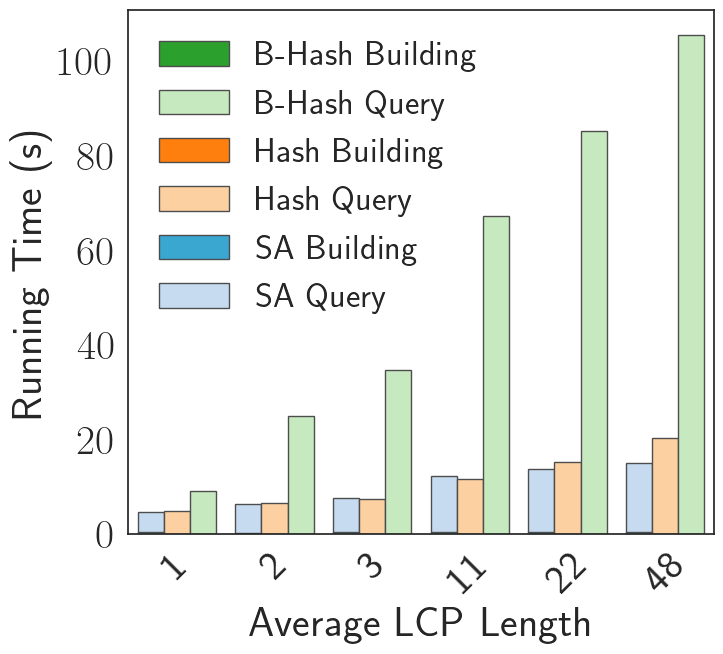

In [126]:

sns.set(rc={'figure.figsize':(7.4,6.7)})
sns.set_style('white')
ax = sns.barplot(x='Average LCP Length', y='value', hue='variable', 
                 hue_order=['SA Query Time', 'Hash Query Time', 'B-Hash Query Time'], 
                 data=pd.melt(full_df_50000, ['Average LCP Length']),palette=google_pal1, edgecolor="0.3",saturation=1)
# ax.set_ylim(0, 100)
ax.set_xlabel(r'Average LCP length', fontsize="30.5", font="Lucida Console Bold")
ax.set_ylabel(r'Running Time($\times(s)$)', fontsize="30.5", font="Lucida Console Bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize="30.5", font="Lucida Console")
# Set the legend title and location
# labels = ["SA Query Time", "Hash Query Time", "B-Hash Query Time"]
labels = ["SA Query", "Hash Query", "B-Hash Query"]
order = [0, 1, 2]
ax.legend(edgecolor='None')
ax = sns.barplot(x='Average LCP Length', y='value', hue='variable', 
                 hue_order=['SA Building Time', 'Hash Building Time', 'B-Hash Building Time'], 
                 data=pd.melt(full_df_50000, ['Average LCP Length']), palette=google_pal2, edgecolor="0.3", saturation=1,bottom=[0]*len(full_df_50000["Average LCP Length"]))
handles, labels = plt.gca().get_legend_handles_labels()
ax.set_ylabel(r'Running Time (s)', fontsize="30.5", font="Lucida Console Bold")
ax.tick_params(axis='both', which='major', labelsize=30)

# Change the order of the handles and labels
#handles = [handles[3], handles[0], handles[4],handles[1],handles[5],handles[2]]
#labels = [labels[3], labels[0], labels[4], labels[1], labels[5], labels[2]]
handles = [handles[5],handles[2],handles[4],handles[1],handles[3], handles[0]]
labels = [labels[5][0:-5], labels[2][0:-5], labels[4][0:-5], labels[1][0:-5], labels[3][0:-5], labels[0][0:-5]]
plt.legend(handles, labels, edgecolor='None', fontsize="25",framealpha=0)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
# plt.show()
plt.savefig("output/lcp_ratio/" + "lcp_ratio.50000" + ".pdf")

In [ ]:
google_pal2

[(0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

In [ ]:
google_pal1

[(0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882)]

In [ ]:
google_pal1


[(0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (1.0, 0.596078431372549, 0.5882352941176471)]